In [65]:
import configparser
from fast_arrow import (
    Auth,
    Stock,
    OptionChain,
    Option
)

# 
# import other libraries
# 
import pandas as pd
import json
import configparser
import seaborn as sns
from matplotlib import pyplot as plt

# 
# configure matplot lib for rendering in jupyter notebooks
# 
%matplotlib inline


# 
# hide the warnings so the graphs 
import warnings
warnings.filterwarnings('ignore')

In [66]:
#
# get the authentication configs
#
config_file = "../config.debug.ini"
config = configparser.ConfigParser()
config.read(config_file)
username = config['account']['username']
password = config['account']['password']


#
# login and get the bearer token
#
token = Auth.login(username, password)
bearer = Auth.get_oauth_token(token)

In [77]:
#
# fetch the stock info for TLT
#
symbol = "TLT"
stock = Stock.fetch(bearer, symbol)


#
# get the TLT option chain info
#
stock_id = stock["id"]
option_chain = OptionChain.fetch(bearer, stock_id)
option_chain_id = option_chain["id"]
expiration_dates = option_chain['expiration_dates']

In [78]:
#
# reduce the number of expiration dates we're interested in
#
next_3_expiration_dates = expiration_dates[0:3]

In [79]:
#
# get all options on the TLT option chain
#
ops = Option.in_chain(bearer, option_chain_id, expiration_dates=next_3_expiration_dates)

#
# merge in market data fro TLT option instruments
#
ops = Option.mergein_marketdata_list(bearer, ops)

In [95]:
df = pd.DataFrame.from_dict(ops)

In [96]:
# 
# fix the data
# 
df.strike_price = pd.to_numeric(df.strike_price, errors='coerce')

In [99]:
# 
# select the data we want to chart
# 
ddf = df
ddf = ddf[ ddf.expiration_date == '2018-08-31']
ddf = ddf[ ddf.strike_price.ge(118.0) ]
ddf = ddf[ ddf.strike_price.le(125.0) ]

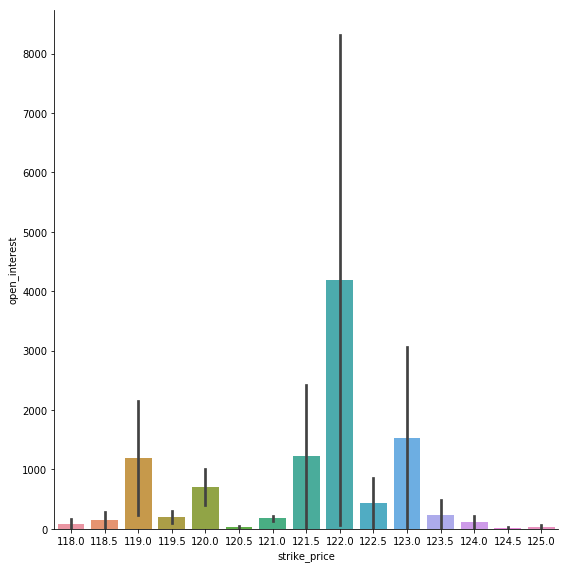

In [105]:
# ax = sns.regplot(x="strike_price", y="open_interest", data=ddf)

g = sns.catplot(x="strike_price", y="open_interest", data=ddf,height=6, kind="bar", palette="muted")